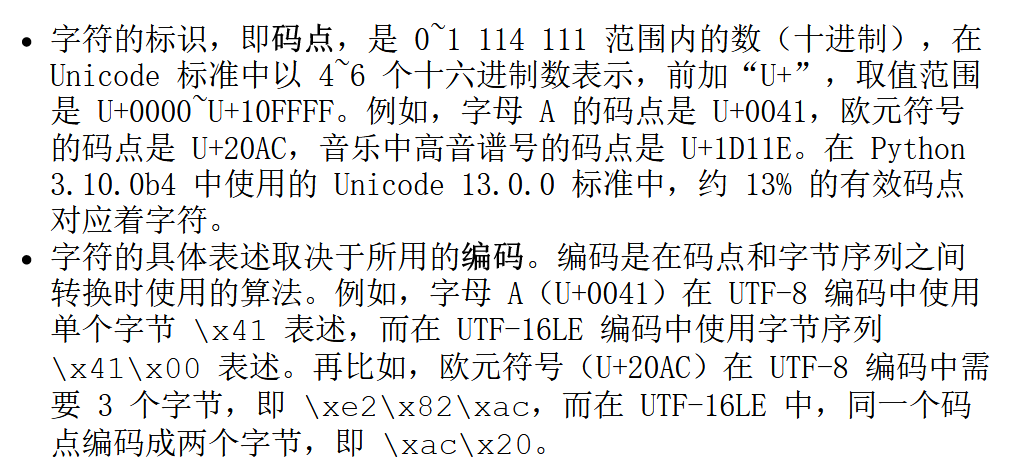
把码点转换为字节序列的过程叫编码，把字节序列转化为码点的过程叫解码。

In [1]:
s = 'café'
len(s)

4

In [2]:
b = s.encode('utf8')
b# byte 字面量以b开头。

b'caf\xc3\xa9'

In [3]:
b.decode('utf8')

'café'

python内置两种基本的二进制序列类型：不可变类型`bytes`,可变类型`bytearray`

`byte` and `bytearray`中的项是0~255的整数。

对单个值索引，返回的是其对应的指数。

在python中，只有`str`类型满足：`str[0]=str[0:1]`


In [4]:
cafe = bytes('café',encoding='utf_8')
print(cafe)
print(cafe[-1])
print(cafe[1])
print(cafe[-1:])# 切片为bytes对象
print(type(cafe))
print(len(cafe))

b'caf\xc3\xa9'
169
97
b'\xa9'
<class 'bytes'>
5


In [5]:
# bytearray没有字面语法，参数是bytes对象
cafe_arr = bytearray(cafe)
print(len(cafe_arr))
print(cafe_arr[-1:])
print(cafe_arr)
print(cafe_arr[1])

5
bytearray(b'\xa9')
bytearray(b'caf\xc3\xa9')
97


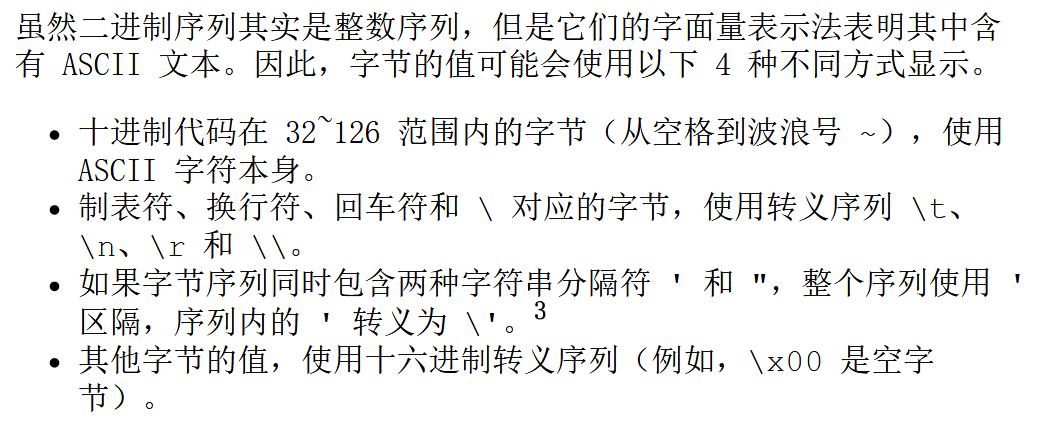

In [6]:
test = bytes('`.;"',encoding='utf-8')
test

b'`.;"'

部分用法示意

In [7]:
# 使用 bytes
data = b'hello world'
print(data.endswith(b'world'))    # True
print(data.startswith(b'hello'))  # True

# 使用 bytearray
data_arr = bytearray(b'hello world')
print(data_arr.endswith(b'world'))    # True
print(data_arr.startswith(b'hello'))  # True

True
True
True
True


In [8]:
# 使用 bytes
data = b'hello world'
new_data = data.replace(b'world', b'python')
print(new_data)  # b'hello python'

# 使用 bytearray
data_arr = bytearray(b'hello world')
data_arr.replace(b'world', b'python')
print(data_arr)  # b'hello python'

b'hello python'
bytearray(b'hello world')


In [9]:
# 使用 bytes
data = b'   hello world   '
print(data.strip())      # b'hello world'
print(data.lstrip())     # b'hello world   '
print(data.rstrip())     # b'   hello world'

# 去除特定字节
data = b'xxxhello worldxxx'
print(data.strip(b'x'))  # b'hello world'

b'hello world'
b'hello world   '
b'   hello world'
b'hello world'


In [10]:
# 创建转换表：将 b'a' 替换为 b'1', b'b' 替换为 b'2'
trans_table = bytes.maketrans(b'ab', b'12')

# 使用 bytes
data = b'acbde'
print(data.translate(trans_table))  # b'12cde'

# 使用 bytearray
data_arr = bytearray(b'abcde')
data_arr.translate(trans_table)
print(data_arr)  # b'12cde'

b'1c2de'
bytearray(b'abcde')


In [11]:
# 使用 bytes
data = b'Hello World'
print(data.upper())  # b'HELLO WORLD'
print(data.lower())  # b'hello world'

# 使用 bytearray
data_arr = bytearray(b'Hello World')
data_arr.upper()
print(data_arr)  # b'HELLO WORLD'

b'HELLO WORLD'
b'hello world'
bytearray(b'Hello World')


In [12]:
# 使用 bytes
data = b'hello world how are you'
parts = data.split()
print(parts)  # [b'hello', b'world', b'how', b'are', b'you']

# 使用特定分隔符
data = b'apple,banana,cherry'
parts = data.split(b',')
print(parts)  # [b'apple', b'banana', b'cherry']

# 使用 bytearray
data_arr = bytearray(b'hello world')
parts = data_arr.split()
print(parts)  # [bytearray(b'hello'), bytearray(b'world')]

[b'hello', b'world', b'how', b'are', b'you']
[b'apple', b'banana', b'cherry']
[bytearray(b'hello'), bytearray(b'world')]


In [13]:
# str与二进制类型的兼容性
# str
text = 'hello'.replace('l','L')
print(text)

# binary
binary = b'hello'.replace(b'l',b'L')
print(binary)

heLLo
b'heLLo'


In [14]:
# 正则表达式的支持
import re

# str
print(re.findall(r"\d+", "123abc"))

# binary
re.findall(rb"\d+",b"123abc")

['123']


[b'123']

In [15]:
# %support
# str
print("Name: %s" % "Alice")
print(b"Name: %b" % b"Alice")

Name: Alice
b'Name: Alice'


In [16]:
# 16进制解析
bytes.fromhex('31 4B CE A9')

b'1K\xce\xa9'

In [17]:
cafe_arr[-1:]

bytearray(b'\xa9')

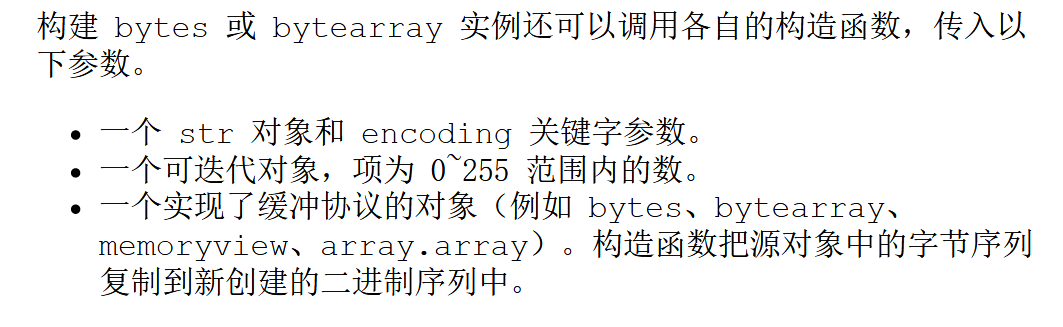

In [18]:
text = 'hello'
b = bytes(text,encoding='utf-8')
print(b)

ba = bytearray(text, encoding='gbk')
print(ba)

b'hello'
bytearray(b'hello')


In [19]:
nums = [65,66,67]
b = bytes(nums)
print(b)

ba = bytearray(range(97,100))
print(ba)

b'ABC'
bytearray(b'abc')


In [20]:
# initialize
print(bytes(3))

b'\x00\x00\x00'


### the difference between bytes and bytearray
- bytes: immutable
- bytearray: mutable

### Buffer Protocol缓冲协议
缓冲协议是 Python 的底层内存共享机制，允许不同对象直接访问同一块内存而不复制数据。其核心作用为高效传递大型数据，支持类型：
- build-in: bytes, bytearray, memoryview, array.array
- third-party: NumPy 数组、PIL 图像等

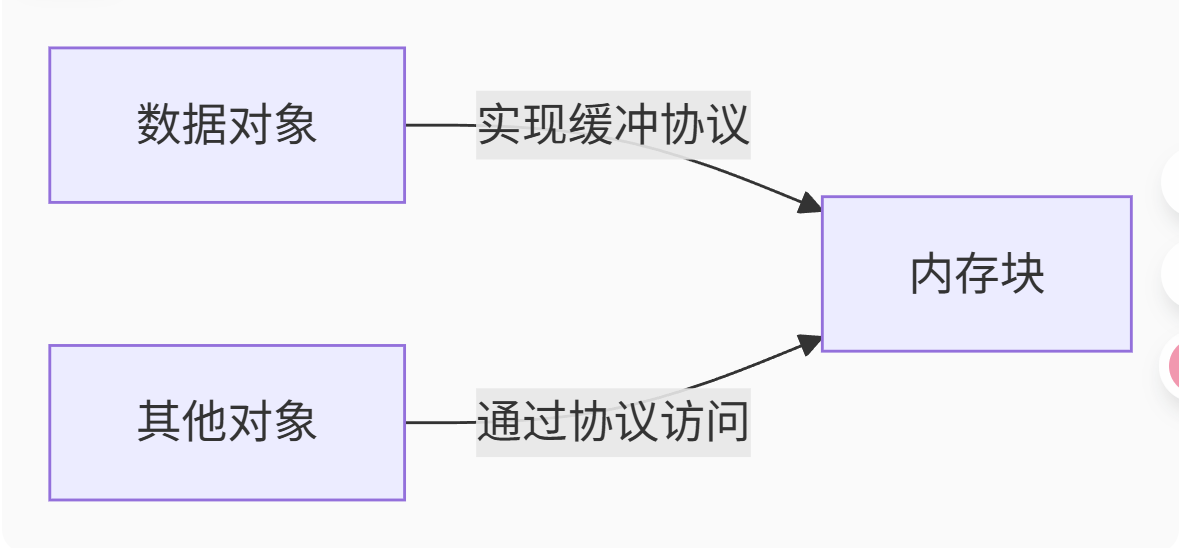

In [21]:
import array
numbers = array.array('h', [-2, -1, 0, 1, 2])
octets = bytes(numbers)
octets

b'\xfe\xff\xff\xff\x00\x00\x01\x00\x02\x00'

In [22]:
# 创建一个字节数组
data = bytearray(b'hello world')

# 创建 memoryview
mv = memoryview(data)

# 通过 memoryview 访问数据（不复制）
print(mv[0])  # 104 (ASCII 'h')
print(bytes(mv[0:5]))  # b'hello'

# 修改原始数据会影响 memoryview
data[0] = 106  # 'j' 的 ASCII 码
print(bytes(mv[0:5]))  # b'jello'

# 修改 memoryview 也会影响原始数据
mv[1] = 65  # 'A' 的 ASCII 码
print(data)  # bytearray(b'jAllo world')

104
b'hello'
b'jello'
bytearray(b'jAllo world')


### 基本的编码器与解码器


有些编码方式不能包含所有的Unicode字符，而utf设计出来的目的就是表示所有字符。

ASCLL是左右编码共同的子集，只要文本全是ASCLL编码，那么就不会在编/解码时产生`UnicodeEncodeError`

In [23]:
# 不同编码器编码同一序列
for codec in ['latin_1','utf8','utf16']:
    print(codec,'El Niño'.encode(codec), sep='\t')

latin_1	b'El Ni\xf1o'
utf8	b'El Ni\xc3\xb1o'
utf16	b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


### 编码解码问题

`UnicodeError` 是一般性的异常,Python 在报告错误时通常更具体,  抛出 `UnicodeEncodeError`(把 str 转换成二进制序列时出错)或 `UnicodeDecodeError`(把二进制序列转换成 str 时出错)。如果源 码的编码与预期不符,那么加载 Python 模块时还可能抛出 `SyntaxError`。

In [24]:
city = 'São Paulo'
city.encode('cp437')

UnicodeEncodeError: 'charmap' codec can't encode character '\u0303' in position 2: character maps to <undefined>

In [25]:
print(city.encode('cp437', errors='ignore'))
print(city.encode('cp437', errors='replace'))
print(city.encode('cp437', errors='xmlcharrefreplace'))

b'Sao Paulo'
b'Sa?o Paulo'
b'Sa&#771;o Paulo'


### 处理`UnicodeDeccodeError`

并非所有字节都包含有效的 ASCII 字符,也并非所有字节序列都是有效 的 UTF-8 或 UTF- 16 码点(部分码点是空的)。因此,把二进制序列转换成文本时,如果 假定使用的是这两个编码中的一个,则遇到无法转换的字节序列时将抛  出 `UnicodeDecodeError`。

'cp1252'、'iso8859_1' 和 'koi8_r' 等陈旧的 8 位 编码能解码任何字节序列流(包括随机噪声),而不抛出错误。因此, 如果程序使用错误的 8 位编码,则可能生成乱码,也不会报错。

在 UTF-8 编码中，0xe9 是一个多字节字符的起始字节。它应该后面跟着一个或多个"延续字节"（格式为 10xxxxxx）

In [26]:
octets = b'Montr\xe9al'
print(octets.decode('utf8'))
print(octets.decode('cp1251'))
print(octets.decode('iso8859_7'))
print(octets.decode('koi8_r'))
print(octets.decode('utf8',errors='replace'))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5: invalid continuation byte

### 鬼符的作用---bom

In [27]:
u16 = 'El Niño'.encode('utf_16')
print(u16)
list(u16)

b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


[255, 254, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

`\xff\xfe`是字节序标记，指明编码时使用Intel CPU小端序。
在大端序中E被编码为`0,69`

为了避免混淆,UTF-16 编码在要编码的文本前面加上特殊的不可见字符  `ZERO WIDTH NO-BREAK SPACE(U+FEFF)`。在小端序系统中,这个 字符编码为 `b'\xff\xfe'`(十进制数 255, 254)。因为按照设计,  Unicode 标准没有 U+FFFE 字符,在小端序编码中,字节序列  `b'\xff\xfe'` 必定是 `ZERO WIDTH NO-BREAK SPACE`,所以编码解 码器知道该用哪个字节序。

UTF-16 有两个变种:UTF-16LE,显式指明使用小端序;UTF-16BE,显式 指明使用大端序。如果直接使用这两个变种,则不生成 BOM。

In [28]:
u16le = 'El Niño'.encode('utf_16le')
print(list(u16le))
u16be = 'El Niño'.encode('utf_16be')
print(list(u16be))


[69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]
[0, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111]


如果有 BOM,那么 UTF-16 编码解码器应把开头的 `ZERO WIDTH NOBREAK SPACE` 字符去掉,只提供文件中真正的文本内容。根据  Unicode 标准,如果文件使用 UTF-16 编码,而且没有 BOM,那么应该 假定使用的是 `UTF-16BE`(大端序)。然而,Intel x86 架构用的是小端 序,因此也有很多文件用的是不带 BOM 的小端序 UTF-16 编码。

In [29]:
u16le = 'El Niño'.encode('utf_8')
print(list(u16le))

[69, 108, 32, 78, 105, 195, 177, 111]


### 处理文本文件
Unicode三明治原则：我们应当尽早把输入的 bytes(例如读取文件得到)解  码成 `str`。在 Unicode 三明治中,“肉饼”是程序的业务逻辑,在这里  只能处理 str 对象。在其他处理过程中,一定不能编码或解码。对输出  来说,则要尽量晚地把 str 编码成 bytes

我们可以轻松地采纳“Unicode 三明治”的建议,因 为内置函数 `open()` 在读取文件时会做必要的解码,以文本模式写入文  件时还会做必要的编码,所以调用 `my_file.read()` 方法得到的以及  传给 `my_file.write(text)` 方法的都是 str 对象。

需要在多台设备中或多种场合下运行的代码,一定不能依赖默 认编码。打开文件时始终应该明确传入 `encoding=` 参数,因为不  同的设备使用的默认编码可能不同,有时隔一天也会发生变化。

In [30]:
print(open('cafe.txt','w',encoding='utf8').write('café'))
open('cafe.txt').read()

4


'café'

In [31]:
fp = open('cafe.txt')
fp

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='utf-8'>

In [32]:
import os
os.stat('cafe.txt').st_size

5

### 了解默认编码


In [33]:
import locale,sys

expressions = """
        locale.getpreferredencoding()
        type(my_file)
        my_file.encoding
        sys.stdout.isatty()
        sys.stdout.encoding
        sys.stdin.isatty()
        sys.stdin.encoding
        sys.stderr.isatty()
        sys.stderr.encoding
        sys.getdefaultencoding()
        sys.getfilesystemencoding()
        """

my_file = open('dummy','w')

for expression in expressions.split():
    value = eval(expression)
    print(f'{expression:>30} -> {value!r}')

 locale.getpreferredencoding() -> 'utf-8'
                 type(my_file) -> <class '_io.TextIOWrapper'>
              my_file.encoding -> 'utf-8'
           sys.stdout.isatty() -> False
           sys.stdout.encoding -> 'UTF-8'
            sys.stdin.isatty() -> False
            sys.stdin.encoding -> 'utf-8'
           sys.stderr.isatty() -> False
           sys.stderr.encoding -> 'UTF-8'
      sys.getdefaultencoding() -> 'utf-8'
   sys.getfilesystemencoding() -> 'utf-8'


In [38]:
from unicodedata import name

print(sys.version)
print()
print('sys.stdout.isatty():',sys.stdout.isatty())
print('sys.sdout.encoding:',sys.stdout.encoding)
print()

test_chars = {
    '\N{HORIZONTAL ELLIPSIS}',
    '\N{INFINITY}',
    '\N{CIRCLED NUMBER FORTY TWO}',
}

for char in test_chars:
    print(f'Trying to output {name(char)}:')
    print(char)

3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]

sys.stdout.isatty(): False
sys.sdout.encoding: UTF-8

Trying to output HORIZONTAL ELLIPSIS:
…
Trying to output INFINITY:
∞
Trying to output CIRCLED NUMBER FORTY TWO:
㊷


### 为比较而规范化Unicode
由于Unicode有组合字符，所以比较较为复杂


In [41]:
s1 = 'café'
s2 = 'cafe\N{COMBINING ACUTE ACCENT}'
print(s1,s2)
print(len(s1),len(s2))
s1==s2

café café
4 5


False

按 Unicode 标准规定,`é` 和 `e\u0301` 是标准等价物  (canonical equivalent),应用程序应把它们视作相同的字符。但是,Python 看到的是不同的码点序列,因此判定二者不相等。

解决方案是使用 `unicodedata.normalize()` 函数。该函 数的第一个参数是 'NFC'、'NFD'、'NFKC' 和 'NFKD' 这 4 个字符 串中的一个。
- NFC(Normalization Form C)使用最少的码点构成等价的字符串
- NFD 把合成字符分解成基字符和单独的组合字符

In [46]:
from unicodedata import normalize
print(len(normalize('NFC',s1)),len(normalize('NFC',s2)))
print(len(normalize('NFD',s1)),len(normalize('NFD',s2)))
print(normalize('NFD',s1)==normalize('NFD',s2))
print(normalize('NFC',s1)==normalize('NFC',s2))

4 4
5 5
True
True


使用 NFC 时,有些单体字符会被规范化成另一个单体字符。例如,电阻 的单位欧姆(Ω)会被规范化成希腊字母大写的奥米伽。二者在视觉上 是一样的,但是比较时并不相等,因此要规范化,以防止出现意外。

In [47]:
from unicodedata import normalize, name
ohm = '\u2126'
name(ohm)

'OHM SIGN'

In [49]:
ohm_c = normalize('NFC', ohm)
print(name(ohm_c))
ohm == ohm_c

GREEK CAPITAL LETTER OMEGA


False